### Joseph EL KETTANEH
# TP1 Apprentissage Automatique 2 
# Régression linéaire

# 1 - Description des données

In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline
import sklearn.datasets
from IPython.display import Image
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()
diabetes = datasets.load_diabetes()

## Boston Dataset

In [3]:

print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS

    Il y a 4 clés dans le groupe ['data', 'target', 'feature_names', 'DESCR'] comme mentionné ci-dessus. Les données comportent 506 lignes et 13 variables de caractéristiques. Notez que cela n'inclut pas la variable cible. Les noms des colonnes sont également extraits.

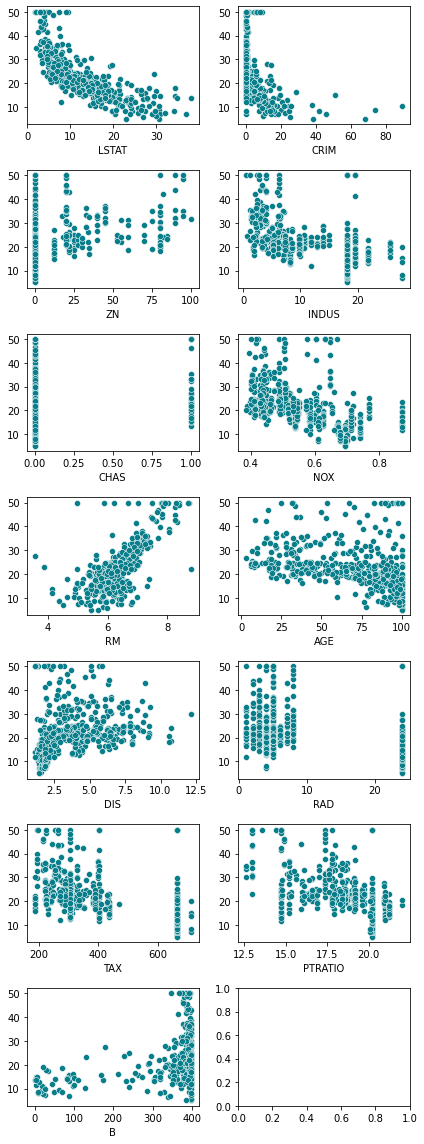

In [4]:
data = boston.data
data = pd.DataFrame(data = data, columns=boston.feature_names)

rows = 7
cols = 2

fig, ax = plt.subplots(rows, cols, figsize = (6, 16))

col = boston.feature_names
index = 0

for i in range(rows):
    for j in range(cols):
        if(index < 13):
            sns.scatterplot(x = boston.feature_names[index-1], y = boston.target, data = data, ax = ax[i][j],color='#087E8B')
            index = index + 1
        
plt.tight_layout()
plt.show()

## Diabetes dataset

In [5]:
print(type(diabetes))
print('\n')
print(diabetes.keys())
print('\n')
print(diabetes.data.shape)
print('\n')
print(diabetes.feature_names)
print(diabetes.DESCR)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


(442, 10)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipo

    Il y a 7 clés dans le groupe ['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'] comme mentionné ci-dessus. Les données comportent 442 lignes et 10 variables de caractéristiques. Notez que cela n'inclut pas la variable cible. Les noms des colonnes sont également extraits.

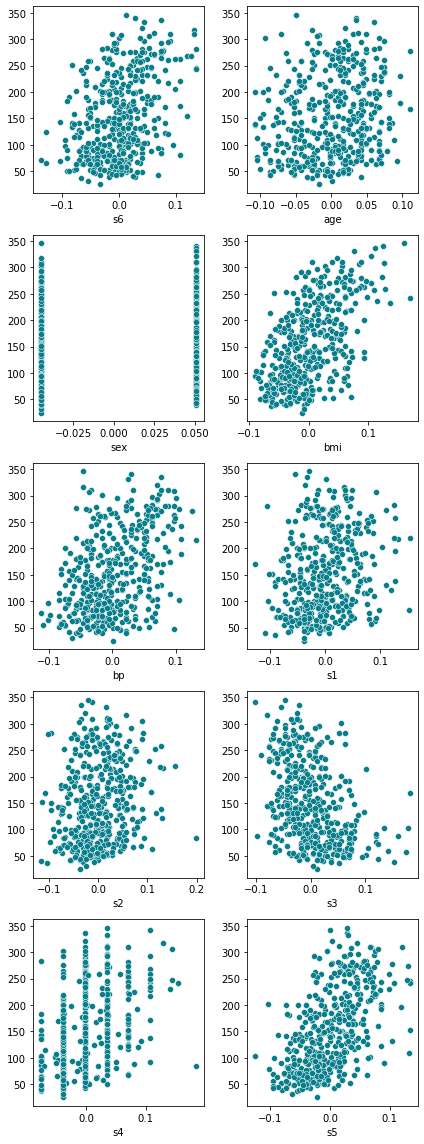

In [6]:
data = diabetes.data
data = pd.DataFrame(data = data, columns=diabetes.feature_names)

rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols, figsize = (6, 16))

col = boston.feature_names
index = 0

for i in range(rows):
    for j in range(cols):
        if(index < 13):
            sns.scatterplot(x = diabetes.feature_names[index-1], y = diabetes.target, data = data, ax = ax[i][j],color='#087E8B')
            index = index + 1
        
plt.tight_layout()
plt.show()

In [7]:
#sns.pairplot(data, x_vars = data.columns.tolist(), y_vars = boston.target)

# 2 - Régression des moindres carrés ordinaires

In [8]:
def my_linear_regressor(X,y):
    X = np.concatenate((X,np.ones((X.shape))),axis=1)
    y = y.reshape((y.shape[0],1))

    w = np.random.normal(0, 0.01, X.shape[1])
    b = np.zeros(1)

    alpha = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    b = alpha[alpha.size-1]
    w = alpha[:-1].copy()

    return alpha, b, w, X, y

def my_lin_reg_predict(X,alpha):
    return X@alpha

    Dans la fonction my_linear_regressor j'ai crée la "matrice augmentée" X en ajoutant une colonne de 1 aux exemples. La fonction va calculer la Valeur de la solution de moindre au carrés alpha


  ## $$\hat{\alpha} = (X^TX)^{-1}X^Ty$$

    Et retourne l'estimation des paramètres des moindres carrés sous une vecteur W et un biais b.
    La fonction my_lin_reg_predict Retourne les prédictions du modele.

  ## $$h(x) = (X^Tw) + b$$

In [9]:
def mse(y, y_pred):
    return np.square(y-y_pred).mean()

def r2(y, y_pred):
#     sst = np.mean((y-np.mean(y))*(y_pred-np.mean(y_pred)))
#     ssr = np.sqrt(np.cov(y)*np.cov(y_pred))
#     r2 = ssr/sst
#     return r2
    return np.mean((y-np.mean(y))*(y_pred-np.mean(y_pred)))/np.sqrt(np.cov(y.T)*np.cov(y_pred.T))



    La fonction mse calcul l'Erreur quadratique moyenne sous la formule:

   ## $$ MSE = \frac{1}{n} \sum_{n=1}^{n} (y_i - \hat{y_i})^2 \ $$

    La fonction r2 Calcule le Coefficient de corrélation sous la formule:

   ## $$r =  \frac{\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})(\hat{y_i} - \bar{\hat{y}})}{\sigma_y\sigma_\hat{y}}$$

### Choix de données à traiter 

In [24]:
from sklearn import datasets
#data ='diabetes'
data = 'boston'
if data == 'boston':
    data = datasets.load_boston(True)
else:
    data = datasets.load_diabetes(True)
    
X, y = data[0],data[1]

### Boston

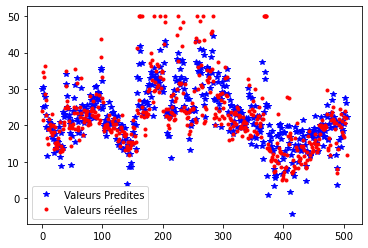

In [13]:
alpha, b, w, X, y = my_linear_regressor(X,y)
predictions = my_lin_reg_predict(X,alpha)

fig, ax = plt.subplots()
ax.plot(predictions, 'b.', marker='*')
ax.plot(y, 'r.')
plt.legend(['Valeurs Predites','Valeurs réelles'])

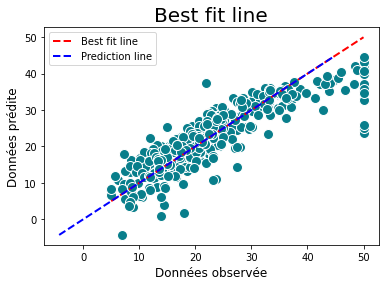

In [14]:
fig, ax = plt.subplots()
ax.scatter(y, predictions, c='#087E8B',edgecolors=(1, 1, 1),s=100) 
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2,label='Best fit line')
ax.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'b--', lw=2,label='Prediction line')
plt.title('Best fit line', size=20)
ax.set_xlabel('Données observée',size=12)
ax.set_ylabel('Données prédite',size=12)
plt.legend()
plt.show()

In [15]:
reg_train_errors = mse(y,predictions)
print("Erreur quadratique moyenne: ",reg_train_errors)

Erreur quadratique moyenne:  21.894831181729195


In [16]:
reg_train_corr = r2(y,predictions)
print("Coefficient de corrélation: ", reg_train_corr)

Coefficient de corrélation:  0.8589051842187879


    On constate que la prediction n'est pas parfaite

### Diabetes

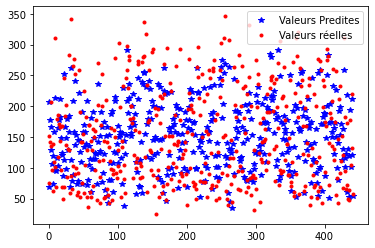

In [267]:
alpha, b, w, X, y = my_linear_regressor(X,y)
predictions = my_lin_reg_predict(X,alpha)

fig, ax = plt.subplots()
ax.plot(predictions, 'b.', marker='*')
ax.plot(y, 'r.')
plt.legend(['Valeurs Predites','Valeurs réelles'])

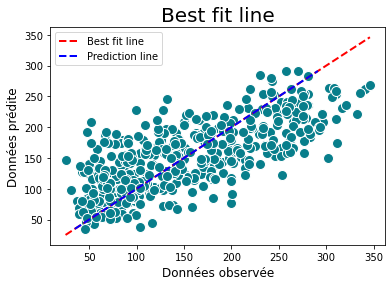

In [268]:
fig, ax = plt.subplots()
ax.scatter(y, predictions, c='#087E8B',edgecolors=(1, 1, 1),s=100) 
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2,label='Best fit line')
ax.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'b--', lw=2,label='Prediction line')
plt.title('Best fit line', size=20)
ax.set_xlabel('Données observée',size=12)
ax.set_ylabel('Données prédite',size=12)
plt.legend()
plt.show()

In [269]:
reg_train_errors = mse(y,predictions)
print("Erreur quadratique moyenne: ",reg_train_errors)

Erreur quadratique moyenne:  2859.6903987680657


In [270]:
reg_train_corr = r2(y,predictions)
print("Coefficient de corrélation: ", reg_train_corr)

Coefficient de corrélation:  0.7179201334483502


    On constate que la prediction n'est pas parfaite dans ce cas aussi.
    Mais le Coefficient de corrélation montre que le model est mieux pour le jeu de données "Boston"

# 3 - Régression Ridge

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
def reg_ridge(X, y, lambda_ridge):
    dimension = X.shape[1]
    S = np.identity(dimension)
    S[X.shape[1]-1,X.shape[1]-1] = 0
    S_lam = S * lambda_ridge
    alpha_ridge = np.linalg.inv(X.T.dot(X) + S_lam).dot(X.T).dot(y)
    #alpha_ridge_pred = X.dot(alpha_ridge)
    return alpha_ridge

def ridge_predict(X,alpha_ridge_l):
    preds = []
    for alpha in alpha_ridge_l:
        pred = X@alpha
        preds.append(pred)
    return preds

    La fonction reg_ridge va calculer la Valeur de la solution de moindre au carrés régularisés sous la formule:

  ## $$\hat{\alpha} = (X^TX + \lambda{}S)^{-1}X^Ty$$

    L’hyperparamètre λ permet de limiter le sur-apprentissage s’il est bien choisi.
    S est une matrice diagonale unitaire dont le dernier terme diagonal est nul.
    La matrice S ajoute λ à tous les éléments de la diagonale de X⊤X, ce qui la rend inversible.

## Boston dataset

In [19]:
lambda_ridge = np.logspace(-4,2,20)
alpha_ridge_l = []
for i in range(lambda_ridge.size):
    alpha_ridge = reg_ridge(X_train,y_train,lambda_ridge[i])
    alpha_ridge_l.append(alpha_ridge)


In [20]:
#predictions
train_preds = ridge_predict(X_train,alpha_ridge_l)
test_preds = ridge_predict(X_test,alpha_ridge_l)

#errors
mins_train_errors = [mse(y_train,preds) for preds in train_preds]
mins_test_errors = [mse(y_test,preds) for preds in test_preds]

#corr_coef
mins_train_corr = [r2(y_train,preds) for preds in train_preds]
mins_test_corr = [r2(y_test,preds) for preds in test_preds]

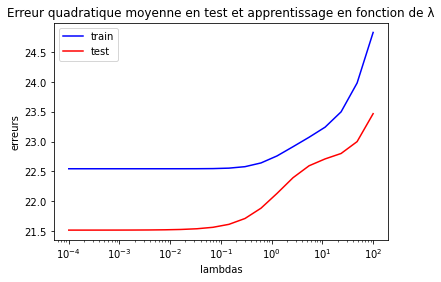

In [21]:
plt.figure()
plt.semilogx(lambda_ridge,mins_train_errors,c="blue",label="train")
plt.semilogx(lambda_ridge,mins_test_errors,c="red",label="test")
plt.xlabel("lambdas")
plt.ylabel("erreurs")
plt.title("Erreur quadratique moyenne en test et apprentissage en fonction de λ")
plt.legend()
plt.show()

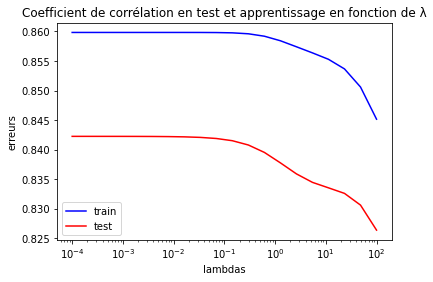

In [22]:
plt.figure()
plt.semilogx(lambda_ridge,mins_train_corr,c="blue",label="train")
plt.semilogx(lambda_ridge,mins_test_corr,c="red",label="test")
plt.xlabel("lambdas")
plt.ylabel("erreurs")
plt.title("Coefficient de corrélation en test et apprentissage en fonction de λ")
plt.legend()
plt.show()

    L'erreur n'est pas 0 donc la prediction n'est pas Parfaite.
    En augmentant les valeurs de λ l'erreur augmente et le coefficient de correlation diminue, donc il faut utiliser un valeur faible de λ pour avoir des bonnes résultâtes 

## Diabetes dataset

In [14]:
lambda_ridge = np.logspace(-4,2,20)
alpha_ridge_l = []
for i in range(lambda_ridge.size):
    alpha_ridge = reg_ridge(X_train,y_train,lambda_ridge[i])
    alpha_ridge_l.append(alpha_ridge)

In [15]:
#predictions
train_preds = ridge_predict(X_train,alpha_ridge_l)
test_preds = ridge_predict(X_test,alpha_ridge_l)

#errors
mins_train_errors = [mse(y_train,preds) for preds in train_preds]
mins_test_errors = [mse(y_test,preds) for preds in test_preds]

#corr_coef
mins_train_corr = [r2(y_train,preds) for preds in train_preds]
mins_test_corr = [r2(y_test,preds) for preds in test_preds]

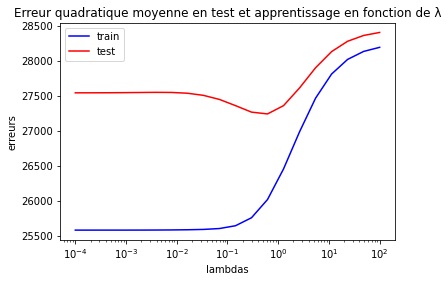

In [16]:
plt.figure()
plt.semilogx(lambda_ridge,mins_train_errors,c="blue",label="train")
plt.semilogx(lambda_ridge,mins_test_errors,c="red",label="test")
plt.xlabel("lambdas")
plt.ylabel("erreurs")
plt.title("Erreur quadratique moyenne en test et apprentissage en fonction de λ")
plt.legend()
plt.show()

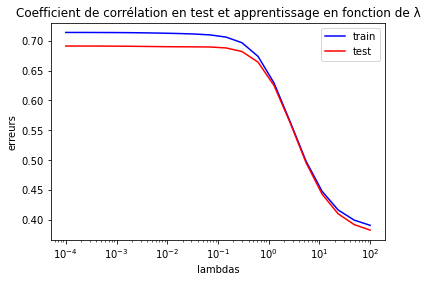

In [17]:
plt.figure()
plt.semilogx(lambda_ridge,mins_train_corr,c="blue",label="train")
plt.semilogx(lambda_ridge,mins_test_corr,c="red",label="test")
plt.xlabel("lambdas")
plt.ylabel("erreurs")
plt.title("Coefficient de corrélation en test et apprentissage en fonction de λ")
plt.legend()
plt.show()

    L'erreur n'est pas 0 donc la prediction n'est pas Parfaite.
    En augmentant les valeurs de λ l'erreur augmente et le coefficient de correlation diminue, donc il faut utiliser un valeur faible de λ pour avoir des bonnes résultâtes (Dans les 2 jeux)

# 4 - Normalisation

## Boston Dataset

In [25]:
X = data[0]
y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train_mean = np.mean(X_train, axis = 0)
X_train_centered = X_train - X_train_mean
X_test_centered = X_test - X_train_mean

y_train_mean = np.mean(y_train)
y_train_centered = y_train - y_train_mean

X_train_centered = np.concatenate((X_train_centered,np.ones((X_train_centered.shape[0],1))),axis = 1)
X_test_centered = np.concatenate((X_test_centered,np.ones((X_test_centered.shape[0],1))),axis = 1)

λ = 0.0000000001
alpha_noncentered_x = reg_ridge(X_train, y_train, λ)
alpha_centered_x_non_y = reg_ridge(X_train_centered, y_train, λ)
alpha_centered_x_y = reg_ridge(X_train_centered, y_train_centered, λ)

print("\n\n\n Biais modèle appris sur les données non-centrées = ",alpha_noncentered_x[alpha_noncentered_x.size-1] )
print("\n Biais du modèle appris sur les données centrées mais avec une réponse non-centrée = "
      ,alpha_centered_x_non_y[alpha_centered_x_non_y.size-1] )
print("\n Biais du modèle appris sur les données centrées avec une réponse centrée = "
      ,alpha_centered_x_y[alpha_centered_x_y.size-1] )
print("\n Moyenne des réponses de l’ensemble d’apprentissage = ", y_train_mean)
print("\n\n\n")





 Biais modèle appris sur les données non-centrées =  -0.46638607306432206

 Biais du modèle appris sur les données centrées mais avec une réponse non-centrée =  23.015819209039563

 Biais du modèle appris sur les données centrées avec une réponse centrée =  1.049160758270773e-14

 Moyenne des réponses de l’ensemble d’apprentissage =  23.01581920903955






In [30]:
test_preds_noncentered = X_test@alpha_noncentered_x
test_preds_centered = X_test_centered@alpha_centered_x_y

coef_corr_non_centered = r2(y_test,test_preds_noncentered)
coef_corr_centered = r2(y_test,test_preds_centered)
mse_non_centered = mse(y_test,test_preds_noncentered)
mse_centered = mse(y_test,test_preds_noncentered)

print("\n\n Coefficient de corrélation en test sur les données non centrées: " , coef_corr_non_centered)
print("\n Coefficient de corrélation en test sur les données centrées: " , coef_corr_centered , "\n\n ")

print("\n\n MSE en test sur les données non centrées: " , mse_non_centered)
print("\n MSE en test sur les données centrées: " , mse_centered , "\n\n ")

from sklearn.metrics import mean_squared_error
mse_bi = mean_squared_error(y_test,test_preds_noncentered)
print(mse_bi)



 Coefficient de corrélation en test sur les données non centrées:  0.8189992015009511

 Coefficient de corrélation en test sur les données centrées:  0.8422595185487475 

 


 MSE en test sur les données non centrées:  24.868111447960036

 MSE en test sur les données centrées:  24.868111447960036 

 


    On Constate que en effectuent la regression lineare sur des données(Train et test) Centrées on a obtenu un meilleur resultat que pour les données non Centrées.

## Diabetes Dataset

In [19]:
X = data[0]
y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_mean = np.mean(X_train, axis = 0)
X_train_centered = X_train - X_train_mean
X_test_centered = X_test - X_train_mean

y_train_mean = np.mean(y_train)
y_train_centered = y_train - y_train_mean

X_train_centered = np.concatenate((X_train_centered,np.ones((X_train_centered.shape[0],1))),axis = 1)
X_test_centered = np.concatenate((X_test_centered,np.ones((X_test_centered.shape[0],1))),axis = 1)

λ = 0.0000000001
alpha_noncentered_x = reg_ridge(X_train, y_train, λ)
alpha_centered_x_non_y = reg_ridge(X_train_centered, y_train, λ)
alpha_centered_x_y = reg_ridge(X_train_centered, y_train_centered, λ)

print("\n\n\n Biais modèle appris sur les données non-centrées = ",alpha_noncentered_x[alpha_noncentered_x.size-1] )
print("\n Biais du modèle appris sur les données centrées mais avec une réponse non-centrée = "
      ,alpha_centered_x_non_y[alpha_centered_x_non_y.size-1] )
print("\n Biais du modèle appris sur les données centrées avec une réponse centrée = "
      ,alpha_centered_x_y[alpha_centered_x_y.size-1] )
print("\n Moyenne des réponses de l’ensemble d’apprentissage = ", y_train_mean)
print("\n\n\n")






 Biais modèle appris sur les données non-centrées =  209.01825674152082

 Biais du modèle appris sur les données centrées mais avec une réponse non-centrée =  153.90291262135912

 Biais du modèle appris sur les données centrées avec une réponse centrée =  -1.0769163338864018e-14

 Moyenne des réponses de l’ensemble d’apprentissage =  153.90291262135923






In [20]:
test_preds_noncentered = X_test@alpha_noncentered_x
test_preds_centered = X_test_centered@alpha_centered_x_y

coef_corr_non_centered = r2(y_test,test_preds_noncentered)
coef_corr_centered = r2(y_test,test_preds_centered)
mse_non_centered = mse(y_test,test_preds_noncentered)
mse_centered = mse(y_test,test_preds_noncentered)

print("\n\n Coefficient de corrélation en test sur les données non centrées: " , coef_corr_non_centered)
print("\n Coefficient de corrélation en test sur les données centrées: " , coef_corr_centered , "\n\n ")

print("\n\n MSE en test sur les données non centrées: " , mse_non_centered)
print("\n MSE en test sur les données centrées: " , mse_centered , "\n\n ")



 Coefficient de corrélation en test sur les données non centrées:  0.691359532391652

 Coefficient de corrélation en test sur les données centrées:  0.6893412982291153 

 


 MSE en test sur les données non centrées:  27539.51048710905

 MSE en test sur les données centrées:  27539.51048710905 

 


    On Constate que pour le jeux de données de diabetes en effectuent la regression lineare sur des données(Train et test) Centrées on a pas obtenu un bon resultat par rapport au predictions des données non Centrées.

##### Conclusion

    On peut dire que la decision du Centrer ou non les données depend du nature du notre problème.

### Sur Données Reduites

### Bonston DataSet

In [31]:
X = data[0]
y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_mean = np.mean(X_train, axis = 0)
X_train_centered = X_train - X_train_mean
X_test_centered = X_test - X_train_mean

y_train_mean = np.mean(y_train)
y_train_centered = y_train - y_train_mean

std_y_train = np.std(y_train_centered, axis = 0)
y_train_red = y_train_centered/std_y_train

std_X_train = np.std(X_train_centered, axis = 0)
X_train_red = X_train_centered/std_X_train

X_test_red = X_test_centered/std_X_train

X_train_centered = np.concatenate((X_train_centered,np.ones((X_train_centered.shape[0],1))),axis = 1)
X_test_centered = np.concatenate((X_test_centered,np.ones((X_test_centered.shape[0],1))),axis = 1)

X_train_red = np.concatenate((X_train_red,np.ones((X_train_red.shape[0],1))),axis = 1)
X_test_red = np.concatenate((X_test_red,np.ones((X_test_red.shape[0],1))),axis = 1)

λ = 0.0000000001

alpha_centered_x_y = reg_ridge(X_train_centered, y_train_centered, λ)
alpha_x_red_y_non = reg_ridge(X_train_red, y_train, λ)
alpha_x_red_y_red = reg_ridge(X_train_red, y_train_red, λ)

print("\n Biais du modèle appris sur les données centrées avec une réponse centrée = "
      ,alpha_x_red_y_non[alpha_x_red_y_non.size-1] )
print("\n Biais du modèle appris sur les données centrées avec une réponse non reduite = "
      ,alpha_centered_x_y[alpha_centered_x_y.size-1] )
print("\n Biais du modèle appris sur les données centrées avec une réponse reduite = "
      ,alpha_x_red_y_red[alpha_x_red_y_red.size-1] )

print("\n Moyenne des réponses de l’ensemble d’apprentissage = ", y_train_mean)
print("\n\n\n")



 Biais du modèle appris sur les données centrées avec une réponse centrée =  23.015819209039563

 Biais du modèle appris sur les données centrées avec une réponse non reduite =  1.049160758270773e-14

 Biais du modèle appris sur les données centrées avec une réponse reduite =  1.1102230246251565e-15

 Moyenne des réponses de l’ensemble d’apprentissage =  23.01581920903955






In [32]:
test_preds_centered = X_test_centered@alpha_centered_x_y
test_preds_red = X_test_red@alpha_x_red_y_red

coef_corr_centered = r2(y_test,test_preds_centered)
coef_corr_red = r2(y_test,test_preds_red)
mse_centered = mse(y_test,test_preds_centered)
mse_red = mse(y_test,test_preds_red)

print("\n\n Coefficient de corrélation en test sur les données centrées: " , coef_corr_centered)
print("\n Coefficient de corrélation en test sur les données reduites: " , coef_corr_red , "\n\n ")

print("\n\n MSE en test sur les données centrées: " , mse_centered)
print("\n MSE en test sur les données reduites: " , mse_red , "\n\n ")



 Coefficient de corrélation en test sur les données centrées:  0.8422595185487475

 Coefficient de corrélation en test sur les données reduites:  0.8422595185492237 

 


 MSE en test sur les données centrées:  554.8237066417639

 MSE en test sur les données reduites:  528.6870042340905 

 


### Diabetes DataSet

In [21]:
X = data[0]
y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_mean = np.mean(X_train, axis = 0)
X_train_centered = X_train - X_train_mean
X_test_centered = X_test - X_train_mean

y_train_mean = np.mean(y_train)
y_train_centered = y_train - y_train_mean

std_y_train = np.std(y_train_centered, axis = 0)
y_train_red = y_train_centered/std_y_train

std_X_train = np.std(X_train_centered, axis = 0)
X_train_red = X_train_centered/std_X_train

X_test_red = X_test_centered/std_X_train

X_train_red = np.concatenate((X_train_red,np.ones((X_train_red.shape[0],1))),axis = 1)
X_test_red = np.concatenate((X_test_red,np.ones((X_test_red.shape[0],1))),axis = 1)

λ = 0.0000000001

alpha_centered_x_y = reg_ridge(X_train_centered, y_train_centered, λ)
alpha_x_red_y_non = reg_ridge(X_train_red, y_train, λ)
alpha_x_red_y_red = reg_ridge(X_train_red, y_train_red, λ)

print("\n Biais du modèle appris sur les données centrées avec une réponse centrée = "
      ,alpha_x_red_y_non[alpha_x_red_y_non.size-1] )
print("\n Biais du modèle appris sur les données centrées avec une réponse non reduite = "
      ,alpha_centered_x_y[alpha_centered_x_y.size-1] )
print("\n Biais du modèle appris sur les données centrées avec une réponse reduite = "
      ,alpha_x_red_y_red[alpha_x_red_y_red.size-1] )

print("\n Moyenne des réponses de l’ensemble d’apprentissage = ", y_train_mean)
print("\n\n\n")

test_preds_centered = X_test_centered@alpha_centered_x_y
test_preds_red = X_test_red@alpha_x_red_y_red



 Biais du modèle appris sur les données centrées avec une réponse centrée =  153.90291262135915

 Biais du modèle appris sur les données centrées avec une réponse non reduite =  41.375369189870526

 Biais du modèle appris sur les données centrées avec une réponse reduite =  -1.5872719805187785e-16

 Moyenne des réponses de l’ensemble d’apprentissage =  153.90291262135923






In [22]:
coef_corr_centered = r2(y_test,test_preds_centered)
coef_corr_red = r2(y_test,test_preds_red)
mse_centered = mse(y_test,test_preds_centered)
mse_red = mse(y_test,test_preds_red)

print("\n\n Coefficient de corrélation en test sur les données centrées: " , coef_corr_centered)
print("\n Coefficient de corrélation en test sur les données reduites: " , coef_corr_red , "\n\n ")

print("\n\n MSE en test sur les données centrées: " , mse_centered)
print("\n MSE en test sur les données reduites: " , mse_red , "\n\n ")



 Coefficient de corrélation en test sur les données centrées:  0.6893412982294483

 Coefficient de corrélation en test sur les données reduites:  0.6893412982281315 

 


 MSE en test sur les données centrées:  27658.953769507956

 MSE en test sur les données reduites:  27274.566946303337 

 


##### Conclusion

    En comparaison les resultats de données centrées et reduites on constate que la différence est tres faible on a presque les mêmes résultats pour les 2 jeux de données.

    Le choix de modèle et de pre-traitement de données dépend du problème et du jeu de données. Les résultats changent par rapport au notre problème. 